In [1]:
import pandas as pd
import numpy as np

In [113]:
data = pd.read_csv('../Projet/clean_data.csv', compression = 'gzip')


In [4]:
data

,ts,number,pick_lat,pick_lng,drop_lat,drop_lng,geodesic_distance,hour,mins,day,month,year,dayofweek,booking_timestamp,booking_time_diff_hr,booking_time_diff_min
0,2020-10-10 07:34:16,-1.0,12.975773,77.571070,12.878468,77.445330,17.38,7,34,10,10,2020,5,1602315256,445087,26705254
1,2020-10-11 08:23:42,-1.0,12.930813,77.609530,12.960320,77.587210,4.06,8,23,11,10,2020,6,1602404622,24,1489
2,2020-10-11 11:57:17,-1.0,12.960213,77.587460,12.930824,77.609610,4.04,11,57,11,10,2020,6,1602417437,3,213
3,2020-10-16 17:51:07,-1.0,12.924353,77.549410,12.932216,77.581825,3.62,17,51,16,10,2020,4,1602870667,125,7553
4,2020-10-30 09:00:44,-1.0,12.945731,77.622500,12.973030,77.616840,3.08,9,0,30,10,2020,4,1604048444,327,19629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3708324,2021-02-12 19:37:11,99999.0,13.029848,77.593400,13.063751,77.589850,3.77,19,37,12,2,2021,4,1613158631,24,1498
3708325,2021-02-19 20:43:25,99999.0,13.029296,77.592580,12.927923,77.627106,11.82,20,43,19,2,2021,4,1613767405,169,10146
3708326,2021-02-20 17:34:45,99999.0,12.907576,77.600685,12.925874,77.607620,2.16,17,34,20,2,2021,5,1613842485,20,1251
3708327,2021-02-27 08:26:23,99999.0,12.956665,77.521870,12.948099,77.562990,4.56,8,26,27,2,2021,5,1614414383,158,9531


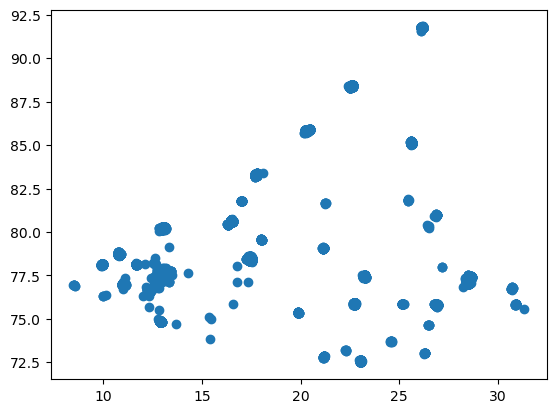

In [5]:
import matplotlib.pyplot as plt

x = data['pick_lat']
y = data['pick_lng']

plt.scatter(x, y)
plt.show()

C:\Users\toshiba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\toshiba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\toshiba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\toshiba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

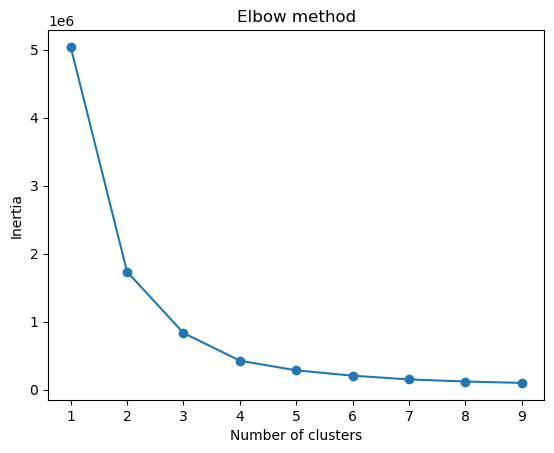

In [6]:
from sklearn.cluster import KMeans

data = list(zip(x, y))
inertias = []

for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,10), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

C:\Users\toshiba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


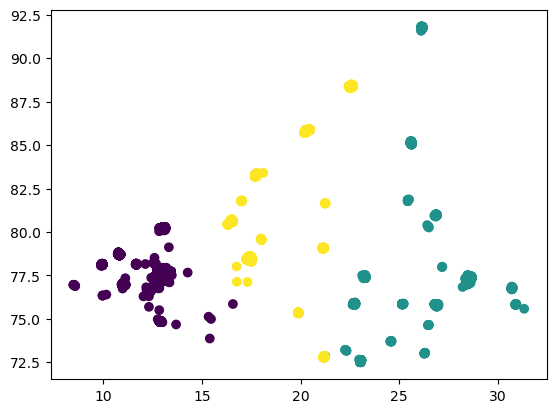

In [7]:
kmeans = KMeans(n_clusters= 3)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()

ValueError: Classification metrics can't handle a mix of continuous-multioutput and multiclass targets

Le code plus haut a été fait par moi mais malheureusement je n' en suis pas 
satisfait car il ne permet pas d' avoir une vision optimale du probleme et 
n' est pas exploitable afin de pouvoir l' utiliser pour l' aide à la décision .
J' ai donc pris la décision d' utiliser le code que j' ai vu sur internet qui est beaucoup plus adequat. Par soucis d' honneteté je precise que la suite de mon code n' est pas de moi il a juste été adapté .


Etant donné que les données pertinentes sont des données géographiques 
il nous faudrait utiliser des packages géospatiaux pour utiliser les données de
maniere éfficiente que nous allons installer .

In [ ]:
installons les packages concernés 

In [20]:
pip install gpxpy

     -------------------------------------- 42.6/42.6 kB 344.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


tenant aussi compte du volume des données nous allons utiliser une package 
qui nous facilitera l' utilisation des données qui sont d' un grand volume 

In [21]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install copy

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement copy (from versions: none)
ERROR: No matching distribution found for copy


Afin d' utiliser les date a bon escient le package date time

In [23]:
pip install datetime 

     -------------------------------------- 52.5/52.5 kB 338.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Nous allons utiliser un variante du l' alghoritme KMEANS le MiniBatchKMeans
ce dernier a l' avantage d' etre plus efficace dans quand on a un flux de données
important .

Important les packages nécéssaires.

In [2]:
from copy import deepcopy
from matplotlib import pyplot as plt
from sklearn.cluster import MiniBatchKMeans, KMeans
import gpxpy.geo
from datetime import datetime, timedelta
from joblib import dump, load
import pandas_profiling

C:\Users\toshiba\AppData\Local\Temp\ipykernel_7044\4021506057.py:7: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


L' idée est de diviser les données en utiliser le temps et l' espace en 
tenant compte du fait que nous sommes en inde . Les clusters seront linkés aux
réégions de l' inde et les centroides en fonctions de ces régions.

In [ ]:
Pour avoir ce decoupage régional nous utiliserons le kmeans .

In [3]:
d = pd.read_csv('../Projet/clean_data.csv', compression = 'gzip')


Chargeons les données spatiales.

In [4]:
coordonnées = d[["pick_lat", "pick_lng"]].values
neighbors = []

In [5]:
def min_distance(centre, nbreclusters):
    good_points = 0
    bad_points = 0
    less_dist = []
    more_dist = []
    min_distance = np.inf  
    for i in range(nbreclusters):
        good_points = 0
        bad_points = 0
        for j in range(nbreclusters):
            if j != i:
                distance = gpxpy.geo.haversine_distance(latitude_1 = centre[i][0], longitude_1 = centre[i][1], latitude_2 = centre[j][0], longitude_2 = centre[j][1])
                distance = distance/(1.60934*1000)   #en mille
                min_distance = min(min_distance, distance) #minimum distance entre cluster
                if distance < 2:
                    good_points += 1
                else:
                    bad_points += 1
        less_dist.append(good_points)
        more_dist.append(bad_points)
    print("Nombre de clusters {}".format(nbreclusters))
    print("Moyenne de distance dans le cluster avec un distance inferieur à 2 miles {}".format(np.ceil(sum(less_dist)/len(less_dist))))
    print(" Moyenne de distance dont les points ont en dehors du cluster avec une distance superieure 2 miles is {}".format(np.ceil(sum(more_dist)/len(more_dist))))
    print("Distance minimale entre cluster = {}".format(min_distance))

Materialisons les régions :

In [11]:
def makingRegions(regions):
    regions = MiniBatchKMeans(n_clusters = regions, batch_size = 10000, random_state = 5).fit(coordonnées)
    centre = regions.cluster_centers_ 
    nbreclusters = len(centre)
    return centre, nbreclusters

Prenons en compte l' aspect temporel 

In [12]:
startTime = datetime.now()
for i in range(10, 100, 10):
    centre, nbreclusters = makingRegions(i)
    min_distance(centre, nbreclusters)
print("Time taken = "+str(datetime.now() - startTime))

C:\Users\toshiba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


Nombre de clusters 10
Moyenne de distance dans le cluster avec un distance inferieur à 2 miles 1.0
 Moyenne de distance dont les points ont en dehors du cluster avec une distance superieure 2 miles is 9.0
Distance minimale entre cluster = 1.8452513910511887


C:\Users\toshiba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


Nombre de clusters 20
Moyenne de distance dans le cluster avec un distance inferieur à 2 miles 1.0
 Moyenne de distance dont les points ont en dehors du cluster avec une distance superieure 2 miles is 19.0
Distance minimale entre cluster = 1.1545125254364603


C:\Users\toshiba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


Nombre de clusters 30
Moyenne de distance dans le cluster avec un distance inferieur à 2 miles 2.0
 Moyenne de distance dont les points ont en dehors du cluster avec une distance superieure 2 miles is 28.0
Distance minimale entre cluster = 0.9690218826203557


C:\Users\toshiba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


Nombre de clusters 40
Moyenne de distance dans le cluster avec un distance inferieur à 2 miles 3.0
 Moyenne de distance dont les points ont en dehors du cluster avec une distance superieure 2 miles is 37.0
Distance minimale entre cluster = 0.8594317659161277


C:\Users\toshiba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


Nombre de clusters 50
Moyenne de distance dans le cluster avec un distance inferieur à 2 miles 4.0
 Moyenne de distance dont les points ont en dehors du cluster avec une distance superieure 2 miles is 46.0
Distance minimale entre cluster = 0.583255561841056


C:\Users\toshiba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


Nombre de clusters 60
Moyenne de distance dans le cluster avec un distance inferieur à 2 miles 4.0
 Moyenne de distance dont les points ont en dehors du cluster avec une distance superieure 2 miles is 56.0
Distance minimale entre cluster = 0.5957341217534055


C:\Users\toshiba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


Nombre de clusters 70
Moyenne de distance dans le cluster avec un distance inferieur à 2 miles 4.0
 Moyenne de distance dont les points ont en dehors du cluster avec une distance superieure 2 miles is 66.0
Distance minimale entre cluster = 0.6750731857249529


C:\Users\toshiba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


Nombre de clusters 80
Moyenne de distance dans le cluster avec un distance inferieur à 2 miles 4.0
 Moyenne de distance dont les points ont en dehors du cluster avec une distance superieure 2 miles is 76.0
Distance minimale entre cluster = 0.6319871055112417


C:\Users\toshiba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


Nombre de clusters 90
Moyenne de distance dans le cluster avec un distance inferieur à 2 miles 6.0
 Moyenne de distance dont les points ont en dehors du cluster avec une distance superieure 2 miles is 84.0
Distance minimale entre cluster = 0.4990331925291192
Time taken = 0:00:44.774536


 La distance mininale devant etre de 0.5 miles nous prendrons le nombre 
 cluster  egal à 90.

In [ ]:
Nous allons donc considérer le nombre de 90 clusters pour notre 
modele MiniBatchKMeans

In [14]:

regions = MiniBatchKMeans(n_clusters = 50, batch_size = 10000, random_state = 0).fit(coordonnées)
d["cluster"] = regions.predict(d[["pick_lat", "pick_lng"]])

C:\Users\toshiba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\toshiba\anaconda3\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but MiniBatchKMeans was fitted without feature names
  warnings.warn(


In [15]:
d


,ts,number,pick_lat,pick_lng,drop_lat,drop_lng,geodesic_distance,hour,mins,day,month,year,dayofweek,booking_timestamp,booking_time_diff_hr,booking_time_diff_min,cluster
0,2020-10-10 07:34:16,-1.0,12.975773,77.571070,12.878468,77.445330,17.38,7,34,10,10,2020,5,1602315256,445087,26705254,45
1,2020-10-11 08:23:42,-1.0,12.930813,77.609530,12.960320,77.587210,4.06,8,23,11,10,2020,6,1602404622,24,1489,21
2,2020-10-11 11:57:17,-1.0,12.960213,77.587460,12.930824,77.609610,4.04,11,57,11,10,2020,6,1602417437,3,213,16
3,2020-10-16 17:51:07,-1.0,12.924353,77.549410,12.932216,77.581825,3.62,17,51,16,10,2020,4,1602870667,125,7553,48
4,2020-10-30 09:00:44,-1.0,12.945731,77.622500,12.973030,77.616840,3.08,9,0,30,10,2020,4,1604048444,327,19629,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3708324,2021-02-12 19:37:11,99999.0,13.029848,77.593400,13.063751,77.589850,3.77,19,37,12,2,2021,4,1613158631,24,1498,24
3708325,2021-02-19 20:43:25,99999.0,13.029296,77.592580,12.927923,77.627106,11.82,20,43,19,2,2021,4,1613767405,169,10146,24
3708326,2021-02-20 17:34:45,99999.0,12.907576,77.600685,12.925874,77.607620,2.16,17,34,20,2,2021,5,1613842485,20,1251,44
3708327,2021-02-27 08:26:23,99999.0,12.956665,77.521870,12.948099,77.562990,4.56,8,26,27,2,2021,5,1614414383,158,9531,7


Incrementons le modele dans nos files

In [16]:
dump(regions, '../Projet/pickup_cluster_model.joblib', compress = 3)


['../Projet/pickup_cluster_model.joblib']

Nous allons maintenant essayons d' illustrer le modele mais dans une region
precise .

Prenons la region du Bangalore dont les coordonnées sont les suivantes :
['12.8340125', '13.1436649', '77.4601025', '77.7840515']  

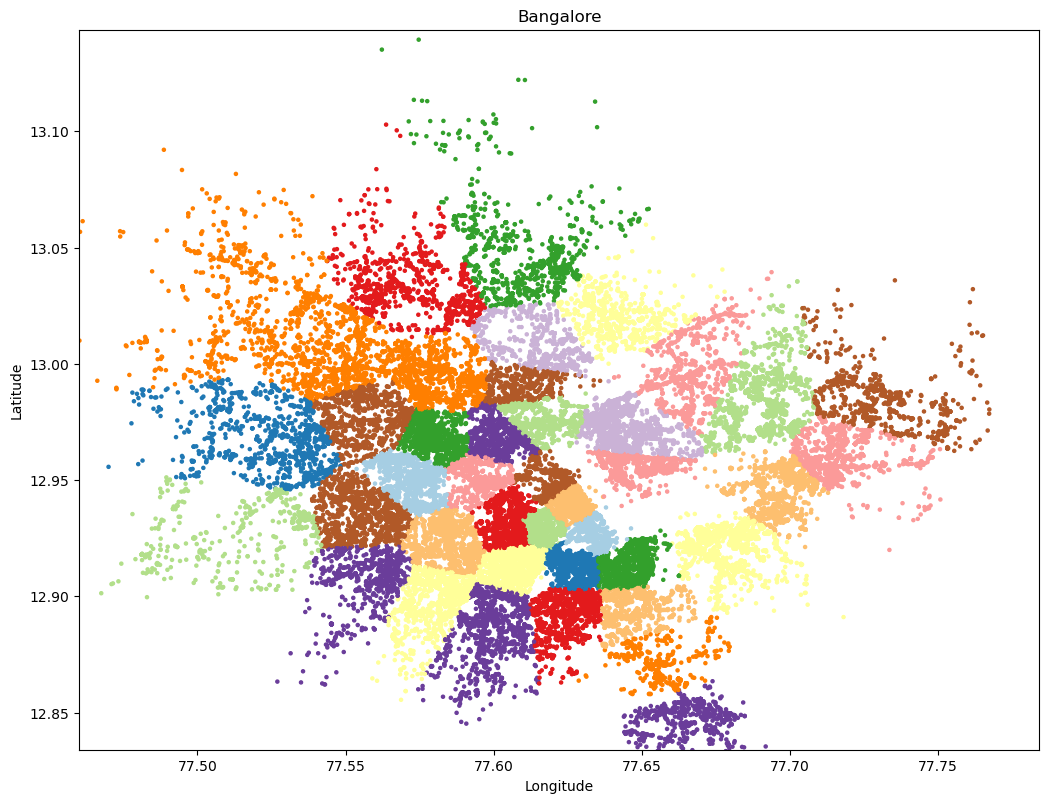

In [17]:
bangalorelat = (12.8340125, 13.1436649)
bangalorelong = (77.4601025, 77.7840515)
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
ax.scatter(x = d.pick_lng.values[:100000], y = d.pick_lat.values[:100000], c = d.cluster.values[:100000], cmap = "Paired", s = 5)
ax.set_xlim(77.4601025, 77.7840515)
ax.set_ylim(12.8340125, 13.1436649)
ax.set_title("Bangalore")
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()


afin d' affiner notre etude nous allons essayer dd' agglommerer les donnees
en données regrouper en plage de trente minutes

In [18]:
def round_timestamp_30interval(x):
    if type(x)==str:
        x = datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
    return x- timedelta(minutes=x.minute%30, seconds=x.second, microseconds=x.microsecond)

d['ts'] = np.vectorize(round_timestamp_30interval)(d['ts'])

selectionnon les colonnes pertinentes que nous utiliserons pour notre modification de
la donnée.

In [19]:
D = d[['ts','number','cluster']]

Transformer les dates en format time

In [23]:

D.ts = pd.to_datetime(D.ts)
D

,ts,cluster,request_count
0,2020-03-26 01:00:00,10,3
1,2020-03-26 01:00:00,19,1
2,2020-03-26 01:30:00,10,1
3,2020-03-26 01:30:00,29,1
4,2020-03-26 01:30:00,45,1
...,...,...,...
551501,2021-03-26 23:30:00,44,7
551502,2021-03-26 23:30:00,45,2
551503,2021-03-26 23:30:00,46,6
551504,2021-03-26 23:30:00,48,3


regroupons nos données en plages de trente minutes

In [24]:
D=D.groupby(by = ['ts','cluster']).count().reset_index()
D.columns = ['ts','cluster','request_count']

In [25]:
D

,ts,cluster,request_count
0,2020-03-26 01:00:00,10,1
1,2020-03-26 01:00:00,19,1
2,2020-03-26 01:30:00,10,1
3,2020-03-26 01:30:00,29,1
4,2020-03-26 01:30:00,45,1
...,...,...,...
551501,2021-03-26 23:30:00,44,1
551502,2021-03-26 23:30:00,45,1
551503,2021-03-26 23:30:00,46,1
551504,2021-03-26 23:30:00,48,1


augmentons des lignes qui separent les dates en differentes donnes
temporelles

In [26]:
D['min'] = D.ts.dt.minute
D['heure'] = D.ts.dt.hour
D['jour'] = D.ts.dt.day
D['mois'] = D.ts.dt.month
D['annee'] = D['ts'].dt.year


In [27]:
D

,ts,cluster,request_count,min,heure,jour,mois,annee
0,2020-03-26 01:00:00,10,1,0,1,26,3,2020
1,2020-03-26 01:00:00,19,1,0,1,26,3,2020
2,2020-03-26 01:30:00,10,1,30,1,26,3,2020
3,2020-03-26 01:30:00,29,1,30,1,26,3,2020
4,2020-03-26 01:30:00,45,1,30,1,26,3,2020
...,...,...,...,...,...,...,...,...
551501,2021-03-26 23:30:00,44,1,30,23,26,3,2021
551502,2021-03-26 23:30:00,45,1,30,23,26,3,2021
551503,2021-03-26 23:30:00,46,1,30,23,26,3,2021
551504,2021-03-26 23:30:00,48,1,30,23,26,3,2021


explorons notre nouveau dataset

In [67]:
profile = D.profile_report()

In [68]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [70]:
D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551506 entries, 0 to 551505
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ts             551506 non-null  datetime64[ns]
 1   cluster        551506 non-null  int64         
 2   min            551506 non-null  int64         
 3   heure          551506 non-null  int64         
 4   mois           551506 non-null  int64         
 5   annee          551506 non-null  int64         
 6   request_count  551506 non-null  int64         
 7   jour           551506 non-null  int64         
dtypes: datetime64[ns](1), int64(7)
memory usage: 33.7 MB


transformons les données année et minutes en integer

In [28]:
D['min'] = pd.to_numeric(D['min'], downcast = 'integer')

In [30]:
D['annee'] = pd.to_numeric(D['annee'], downcast = 'integer')

In [73]:
D = D[['ts','cluster','min','heure','jour','mois','annee','request_count',]]

In [31]:
D

,ts,cluster,request_count,min,heure,jour,mois,annee
0,2020-03-26 01:00:00,10,1,0,1,26,3,2020
1,2020-03-26 01:00:00,19,1,0,1,26,3,2020
2,2020-03-26 01:30:00,10,1,30,1,26,3,2020
3,2020-03-26 01:30:00,29,1,30,1,26,3,2020
4,2020-03-26 01:30:00,45,1,30,1,26,3,2020
...,...,...,...,...,...,...,...,...
551501,2021-03-26 23:30:00,44,1,30,23,26,3,2021
551502,2021-03-26 23:30:00,45,1,30,23,26,3,2021
551503,2021-03-26 23:30:00,46,1,30,23,26,3,2021
551504,2021-03-26 23:30:00,48,1,30,23,26,3,2021


In [87]:
D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551506 entries, 0 to 551505
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ts             551506 non-null  datetime64[ns]
 1   cluster        551506 non-null  int64         
 2   min            551506 non-null  int64         
 3   heure          551506 non-null  int64         
 4   jour           551506 non-null  int64         
 5   mois           551506 non-null  int64         
 6   annee          551506 non-null  int64         
 7   request_count  551506 non-null  int64         
dtypes: datetime64[ns](1), int64(7)
memory usage: 33.7 MB


nous allons construire le modele de regression lineaire afin de determiner
si on peut avoir un modele predictif plus efficient .
C' est dans ce but que nous avons effectuer les transformations plus haut.

Il nous faut importer les package necessaire et les metriques d' evaluation

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics


In [34]:
D_train = D[D.ts.dt.day <=25]
D_test = D[D.ts.dt.day >25]

definissons nous groupe de entrainement et de test pour le modele proprement
dit

In [35]:
X = D_train.iloc[:,1:-1]
y = D_train.iloc[:,-1]
X_test = D_test.iloc[:,1:-1]
y_test = D_test.iloc[:,-1]

enlevons toutes les lignes contenant des données nann

In [36]:
D.dropna(how='all', inplace=True)


In [37]:
y

7608      2020
7609      2020
7610      2020
7611      2020
7612      2020
          ... 
549713    2021
549714    2021
549715    2021
549716    2021
549717    2021
Name: annee, Length: 453512, dtype: int16

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

mettons le modele en marche et regardons les resultats

In [40]:
model=LinearRegression()   #build linear regression model
model.fit(X,y)  #fitting the training data
predicted=model.predict(X_test) #testing our model’s performance
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 0.09706088356158442
R squared 0.3605264530939192


les resultat ne sont pas bons moins de cinquante pour cent des prediction sont justes


In [ ]:
essayons un autre modele la foret aleatoire

In [110]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state=42, n_jobs = -1, verbose=True)
regressor.fit(X,y)
print("RMSE TRAIN: {}, RMSE TEST:{}".format(sqrt(mean_squared_error(y, regressor.predict(X))), metrics_calculate(regressor)))


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min


MemoryError: could not allocate 33554432 bytes

notre machine n' est pas assez puissante car les donnees sont trop volumineuses


In [ ]:
essayons maintenant un autre alghorithme pour voir si on peut 
avoir de meilleur resultat

In [ ]:
d' apres nos recherches le xgbosst pourrait nous aider essayons d' installer 
le package

In [41]:
pip install xgboost

     ---------------------------------------- 99.8/99.8 MB 3.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [42]:
import xgboost as xgb
model=xgb.XGBRegressor(learning_rate=0.01, random_state=0, n_estimators=600, max_depth=8, objective="reg:squarederror")

eval_set = [(X_test, y_test)]
model.fit(X,y,verbose=True, eval_set=eval_set, early_stopping_rounds=30,eval_metric="rmse")
print("XGBOOST Regressor")
print("Model Score:",model.score(X,y))

[0]	validation_0-rmse:0.40197
[1]	validation_0-rmse:0.39856
[2]	validation_0-rmse:0.39521
[3]	validation_0-rmse:0.39187
[4]	validation_0-rmse:0.38858


C:\Users\toshiba\anaconda3\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\toshiba\anaconda3\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:0.38537
[6]	validation_0-rmse:0.38222
[7]	validation_0-rmse:0.37908
[8]	validation_0-rmse:0.37600
[9]	validation_0-rmse:0.37303
[10]	validation_0-rmse:0.37008
[11]	validation_0-rmse:0.36717
[12]	validation_0-rmse:0.36429
[13]	validation_0-rmse:0.36152
[14]	validation_0-rmse:0.35876
[15]	validation_0-rmse:0.35606
[16]	validation_0-rmse:0.35337
[17]	validation_0-rmse:0.35074
[18]	validation_0-rmse:0.34818
[19]	validation_0-rmse:0.34568
[20]	validation_0-rmse:0.34319
[21]	validation_0-rmse:0.34072
[22]	validation_0-rmse:0.33830
[23]	validation_0-rmse:0.33596
[24]	validation_0-rmse:0.33366
[25]	validation_0-rmse:0.33139
[26]	validation_0-rmse:0.32916
[27]	validation_0-rmse:0.32695
[28]	validation_0-rmse:0.32485
[29]	validation_0-rmse:0.32276
[30]	validation_0-rmse:0.32070
[31]	validation_0-rmse:0.31867
[32]	validation_0-rmse:0.31667
[33]	validation_0-rmse:0.31471
[34]	validation_0-rmse:0.31283
[35]	validation_0-rmse:0.31099
[36]	validation_0-rmse:0.30917
[37]	validati

In [ ]:
Le score est beaucoup  plus efficient.
On peut en deduire que quelque soit le probleme il nous definir l' algorithme
le plus adequat pour résoudre notre probleme et de voir à partir des metriques la qualite
du modele a utiliser.